In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # 設定從哪顆鏡頭讀取影像，在括弧中填入先前查詢到的webcam編號
# webcam = cv2.VideoCapture(0)
# # 讀取影像
# return_value, image = webcam.read()
# # 儲存名為Picture.png的照片
# cv2.imwrite("Picture.png", image)
# # 刪除webcam，避免影像佔用資源
# del(webcam)

In [3]:
# #開啟視窗顯示影像
# cv2.imshow('Picture.png', image)
# # 不刷新影像
# cv2.waitKey(0)
# # 釋放資源
# cv2.destroyAllWindows()

In [4]:
img = cv2.imread("Picture.png",cv2.IMREAD_UNCHANGED)
img_2 = img[:,:,[2,1,0]]

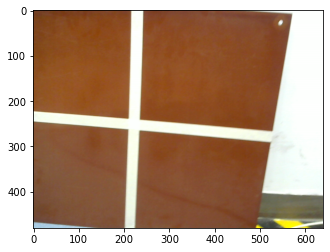

In [6]:
plt.imshow(img_2)

In [7]:
# 轉換BGR到HSV
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# range of white color in L channel L通道白色範圍
# mask = cv2.inRange(imgHSV[:,:,1], lower=250, upper=255)
mask = cv2.inRange(imgHSV, np.array([0,0,0]), np.array([20,255,255]))

# Apply Mask to original image 將蒙版應用到原始圖像
white_mask = cv2.bitwise_and(img,img, mask=mask)

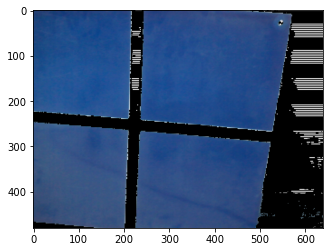

In [18]:
plt.imshow(white_mask)

In [9]:
# cv2.imshow('white_mask', white_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

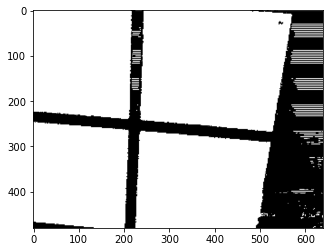

In [10]:
img_gray = cv2.cvtColor(white_mask, cv2.COLOR_BGR2GRAY)
ret, im2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plt.imshow(img_gray,plt.cm.gray)
plt.imshow(im2,plt.cm.gray)

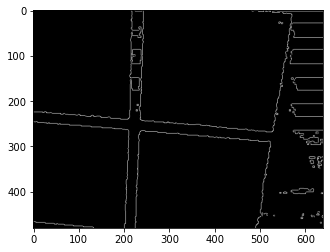

In [11]:
gimg = cv2.GaussianBlur(img_gray, (5, 5), 0)
gret, gim2 = cv2.threshold(gimg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(gim2, plt.cm.gray)
edges = cv2.Canny(gim2, 45,135)
plt.imshow(edges, plt.cm.gray)

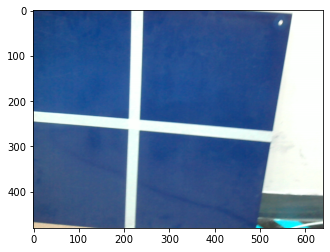

In [12]:
img_n = img
plt.imshow(img_n, plt.cm.gray)

In [13]:
# minLineLength = 10
# maxLineGap = 5
# lines = cv2.HoughLines(edges, 1, np.pi/180, 7)
# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
# #img5 = np.zeros((320, 320, 3), np.uint8)
# cv2.line(img,(x1,y1),(x2,y2),(0,0,255),10)
# plt.imshow(img, plt.cm.gray)

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def cleanlines(lines):
    #清除重复的线条
    for lineindex, line in enumerate(lines):
        if line[0]<0:
            lines[lineindex][0] = -line[0]
            lines[lineindex][1] = line[1]-np.pi    
    newlines = []
    newlines.append(lines.pop(5))
    for line in lines:
        flag = 0
        for newline in newlines:
            if((abs(line[0]-newline[0])<10)&(abs(line[1]-newline[1])<0.1)):
                flag = 1
        if(flag==0):
            newlines.append(line)
    return newlines

In [16]:
def IntersectionPoints(lines):
    #求出交点
    points = []
    if(len(lines)==4):
        horLine = []
        verLine = []
        for line in lines:
            if((line[1]>(0-0.1))&(line[1]<(0+0.1))):
                horLine.append(line)
            else:
                verLine.append(line)
        print(horLine)
        for l1 in horLine:
            for l2 in verLine:
                a = np.array([
                    [np.cos(l1[1]), np.sin(l1[1])],
                    [np.cos(l2[1]), np.sin(l2[1])]
                ])
                b = np.array([l1[0],l2[0]])
                points.append(np.linalg.solve(a, b))
        return points
    else:
        print("the number of lines error")

In [17]:
img = cv2.imread('sam.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, im2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plt.imshow(img_gray,plt.cm.gray)
#plt.imshow(im2,plt.cm.gray)


gimg = cv2.GaussianBlur(img_gray, (5, 5), 0)
gret, gim2 = cv2.threshold(gimg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plt.imshow(gim2, plt.cm.gray)
edges = cv2.Canny(gim2, 45,135)

In [37]:
minLineLength = 10
maxLineGap = 5
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)



In [1]:
img_gray

NameError: name 'img_gray' is not defined

In [39]:
lines = [line[0] for line in lines.tolist()]

In [44]:
line[3]

IndexError: list index out of range

In [40]:
lines

[[254.0, 1.5707963705062866],
 [287.0, 1.5707963705062866],
 [337.0, 0.0],
 [304.0, 0.0],
 [-332.0, 3.1241393089294434],
 [248.0, 1.5882495641708374],
 [307.0, 0.01745329238474369]]

In [23]:
lines = cleanlines(lines)
points = IntersectionPoints(lines)##
for line in lines:
    rho, theta = line
    print(rho, theta)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    cv2.line(img,(x1, y1), (x2, y2), (0, 255, 0), 1)


[[248.0, 1.5882495641708374],
 [287.0, 1.5707963705062866],
 [337.0, 0.0],
 [304.0, 0.0]]

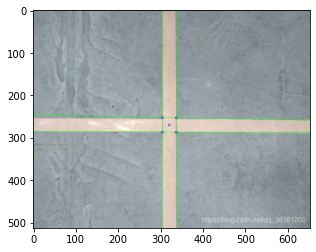

In [22]:
for point in points:
    cv2.circle(img, (int(point[0]),int(point[1])), 3, (0,0,255))
midx = np.mean([point[0] for point in points])
midy = np.mean([point[1] for point in points])
cv2.circle(img, (int(midx), int(midy)), 3, (0,0,255))
plt.figure()
plt.imshow(img)
plt.show()